# Computer Sciences for Physics and Chemistry – Homework
**Written by: Rahim Alizada, L3 Chemical Engineering**

First part: Diffusion in 1 dimension: the drunk walker

Let us consider a drunk walker that moves along in a street (considered as a straight line). At each step, he has a probability 𝑝 to move forward and 1−𝑝 to move backward.

1. Write a function that calculates the final position of the walker as a function of the parameter 𝑝 and the number of steps 𝑁

In [0]:
# importing all the necessary packages
import numpy as np
from numpy.random import choice
from scipy.stats import shapiro
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# the function that will calculate the position for the given number of steps
def calc_pos(steps, p=0.5):
    pos = 0
    for i in range(steps):
        pos += choice([1, -1], 1, p=[p, 1-p])
    return pos

2. What is the expected final position for 𝑝=0.5? Check your guess by running your function 100 times for 1000 steps.

N - 1000:  [-48]


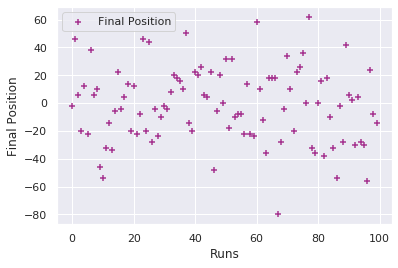

In [0]:
print("N - 1000: ", calc_pos(1000))
results = []
for i in range(100):
    results.append(calc_pos(1000))
results = np.array(results)
plt.scatter(np.arange(100), results, label="Final Position", marker='+', color='#A5338F')
plt.xlabel("Runs")
plt.ylabel("Final Position")
plt.legend()
plt.show()

3. Represent the result as a histogram. Calculate the standard deviation 𝜎1000 and demonstrate that the distribution you obtained is a Gaussian.

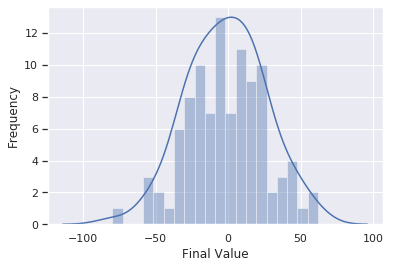

std_100 26.782643633517583
p-value of the file: 0.9536940455436707


In [0]:
ax = sns.distplot(results, kde=False, bins=20)
second_ax = ax.twinx()
sns.distplot(results, ax=second_ax, kde=True, hist=False)
second_ax.set_yticks([])
ax.set_xlabel("Final Value")
ax.set_ylabel("Frequency")
plt.show()
print("std 100", results.std())
print("p-value of the file: {}".format(shapiro(results)[1]))

4. Do the same for 20, 50, 100 and 200 steps. Fit the standard deviation 𝜎𝑁 as a function of the number of steps 𝑁 with appropriate mathematical law.

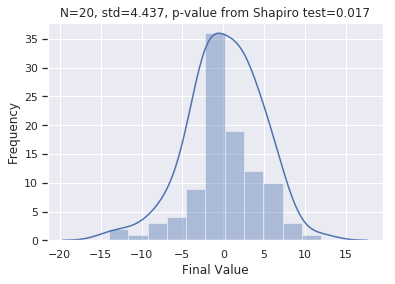

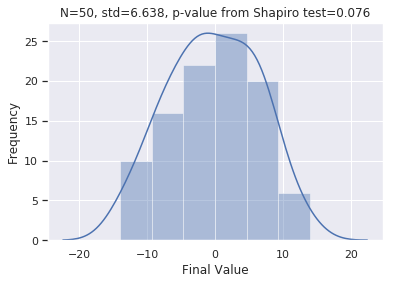

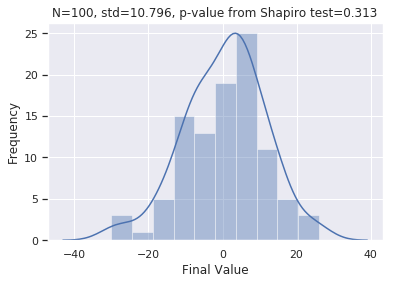

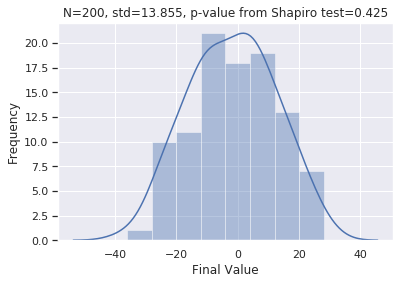

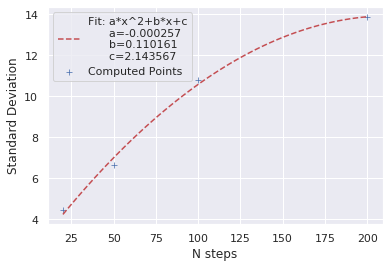

In [0]:
steps = [20, 50, 100, 200]
stds = []
for step in steps:
    results = []
    for i in range(100):
        results.append(calc_pos(step))
    results = np.array(results)

    f, ax = plt.subplots()
    ax = sns.distplot(results, kde=False)
    ax.set_title("N={}, std={}, p-value from Shapiro test={}"
                 .format(step, round(results.std(), 3), round(shapiro(results)[1], 3)))
    second_ax = ax.twinx()
    sns.distplot(results, ax=second_ax, kde=True, hist=False)
    second_ax.set_yticks([])
    ax.set_xlabel("Final Value")
    ax.set_ylabel("Frequency")
    plt.show()
    stds.append(np.array(results).std())


def func(x, a, b, c):
    return a*x*x + b*x + c


sns.scatterplot(steps, stds, label='Computed Points', marker='+')
popt, pcov = curve_fit(func, steps, stds)
plt.plot(np.linspace(steps[0], steps[-1], 100), func(np.linspace(steps[0], steps[-1], 100), *popt), 'r--', color='r',
         label='Fit: a*x^2+b*x+c\n      a=%s\n      b=%s\n      c=%s' % tuple([round(x, 6) for x in popt]))
plt.xlabel("N steps")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

5. Now 𝑝=0.75. What is the expected final position as a function of the number of time steps N. Check your assumption.

Text(0, 0.5, 'Position')

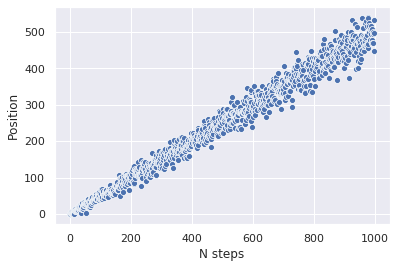

In [0]:
steps = np.arange(1000)
results = []
for step in steps:
    results.append(calc_pos(step, p=0.75))

sns.scatterplot(steps, results)
plt.xlabel("N steps")
plt.ylabel("Position")

Second part: Diffusion in 2 dimensions: diffusion of a dye in water

In this part, we will simulate the diffusion of a dye drop in a water puddle. The water puddle is represented by a lattice of 20 lines and 20 columns. At the initial time step, box of the lattice is empty, except the four at the center which contains 100 particles of dye. At each time step, each molecule moves according to the following rules :

(i) the molecule has a probability 𝑝 to stay in its box,

(ii) if the molecule moves, it moves one box and all possible moving directions are equiprobable (e.g. 0.25∙(1−𝑝) to go up, down, left or right if the particle is in the center of the lattice, 0.33∙(1−𝑝) to go up, down or left if the particle in is a top-right box of a row, or 0.5∙(1−𝑝) to go down or right if the particle is in the upper left corner box), and

(iii) the molecule can not go out of the lattice.

1. Write a function that computes the final position of each molecule walker as a
function of the parameter 𝑝 and the number of steps 𝑁.

In [0]:
def calc_pos(N, p=0.2):
    # initializing 400 particles' locations
    pos_array = np.zeros((400, 2))
    pos_array[0:100] = [9, 9]
    pos_array[100:200] = [9, 10]
    pos_array[200:300] = [10, 9]
    pos_array[300:400] = [10, 10]
    for ii in range(pos_array.shape[0]):
        pos = pos_array[ii]
        for iii in range(N):
            # at center
            if 19 > pos[0] > 0 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [-1, 0], [0, 1], [1, 0]]
                pos += np.array(choices[choice(len(choices), 1,
                                               p=[p, 0.25 * (1 - p), 0.25 * (1 - p), 0.25 * (1 - p), 0.25 * (1 - p)])[
                    0]])

            # at upper left corner
            elif pos[0] == 0 and pos[1] == 00:
                choices = [[0, 0], [0, 1], [1, 0]]
                pos += np.array(choices[choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at upper boundary
            elif pos[0] == 0 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [0, 1], [1, 0]]
                pos += np.array(
                    choices[choice(len(choices), 1, p=[p, 0.333 * (1 - p), 0.333 * (1 - p), 0.334 * (1 - p)])[0]])

            # at upper right corner
            elif pos[0] == 0 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [1, 0]]
                pos += np.array(choices[choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at left boundary
            elif 19 > pos[0] > 0 and pos[1] == 0:
                choices = [[0, 0], [-1, 0], [0, 1], [1, 0]]
                pos += np.array(
                    choices[choice(len(choices), 1, p=[p, 0.333 * (1 - p), 0.333 * (1 - p), 0.334 * (1 - p)])[0]])

            # at right boundary
            elif 19 > pos[0] > 0 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [-1, 0], [1, 0]]
                pos += np.array(
                    choices[choice(len(choices), 1, p=[p, 0.333 * (1 - p), 0.333 * (1 - p), 0.334 * (1 - p)])[0]])

            # at bottom boundary
            elif pos[0] == 19 and 19 > pos[1] > 0:
                choices = [[0, 0], [0, -1], [-1, 0], [0, 1]]
                pos += np.array(
                    choices[choice(len(choices), 1, p=[p, 0.333 * (1 - p), 0.333 * (1 - p), 0.334 * (1 - p)])[0]])

            # at bottom left corner
            elif pos[0] == 19 and pos[1] == 0:
                choices = [[0, 0], [-1, 0], [0, 1]]
                pos += np.array(choices[choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])

            # at bottom right corner
            elif pos[0] == 19 and pos[1] == 19:
                choices = [[0, 0], [0, -1], [-1, 0]]
                pos += np.array(choices[choice(len(choices), 1, p=[p, 0.5 * (1 - p), 0.5 * (1 - p)])[0]])
        pos_array[ii] = pos

    return pos_array


2. Fix 𝑝 = 0.2. Represent the positions of the molecules in a scattered plot after 5, 10, 20 and 50 time steps.

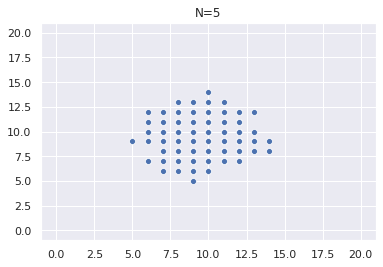

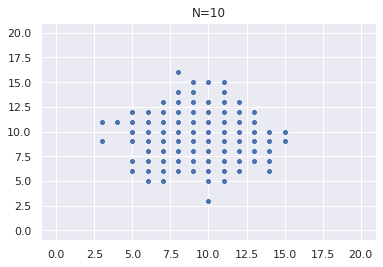

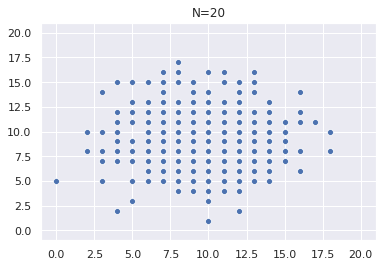

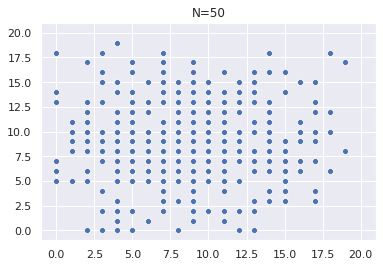

In [0]:
steps = [5, 10, 20, 50]
for c, step in enumerate(steps):
    output = calc_pos(N=step)
    f, ax = plt.subplots()
    ax = sns.scatterplot(output[:, 0], output[:, 1])
    ax.set_title("N=" + str(step))
    ax.set_xlim(left=-1, right=21)
    ax.set_ylim(bottom=-1, top=21)
    plt.show()

In physics or chemistry, we define the notion of entropy to quantify the neatness of a
system. For a discrete system, the entropy is calculated like this
𝑆 = −𝑘𝐵 ∙ Σ 𝑃𝑖 ∙ 𝑙𝑛(𝑃𝑖 )
𝑖
Where 𝑘𝐵 = 1.38𝑒−23 is the Boltzmann constant and 𝑃𝑖 is the average ratio of particles
in the box 𝑖 (number of particle in the box 𝑖 divided by the total number of particle

In [0]:
# Entropy calculation
def calc_entropy(coordinates):
    kb = 1.38e-23
    Pi = []
    Pi_with_zero = np.zeros((20, 20))
    for column in range(20):
        for row in range(20):
            if coordinates[(coordinates[:, :] == [row, column]).all(1)].shape[0] != 0:
                Pi.append(coordinates[(coordinates[:, :] == [row, column]).all(1)].shape[0] / 400)
                Pi_with_zero[row, column] = coordinates[(coordinates[:, :] == [row, column]).all(1)].shape[0] / 400
            else:
                Pi_with_zero[row, column] = 0
    H = -kb * np.sum(Pi * np.log(Pi))
    return H, Pi_with_zero


3. Run 25 computations with 𝑵 = 𝟓𝟎 time steps and calculate the average
value of 𝑃𝑖 for each box. Then, computes the entropy for 𝑵 = 𝟓𝟎.

Average Entropy 7.166076779759778e-23


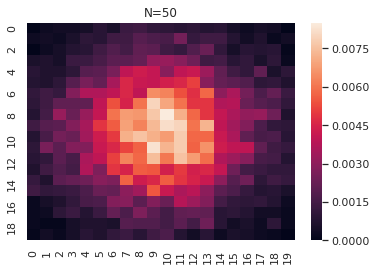

In [0]:
coordinates = calc_pos(N=50)
entropy_all, Pi_all = calc_entropy(coordinates)
Pi_all = Pi_all[:, :, np.newaxis]
for i in range(24):
    coordinates = calc_pos(N=50)
    entropy, pi = calc_entropy(coordinates)
    Pi_all = np.dstack((Pi_all, pi))
    entropy_all = np.append(entropy_all, entropy)
pi_avgs = Pi_all.mean(axis=2)
f, ax = plt.subplots()
ax.set_title("N={}".format(50))
ax = sns.heatmap(pi_avgs)
print("Average Entropy: {}".format(entropy_all.mean()))

4. Do the same for 𝑵 = 𝟓 , 𝑵 = 𝟏𝟎 , 𝑵 = 𝟐𝟎 and 𝑵 = 𝟓𝟎. Plot S(N) and find a mathematical function that fits the variation of entropy with respect to the number of time steps S(N)

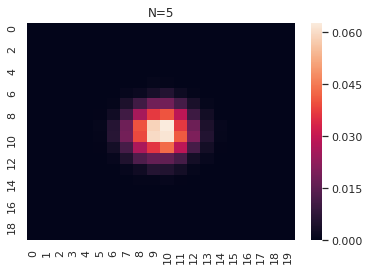

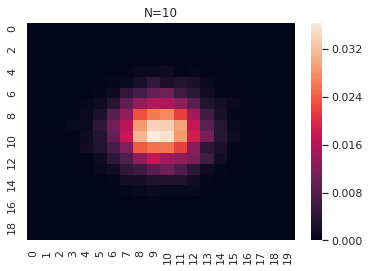

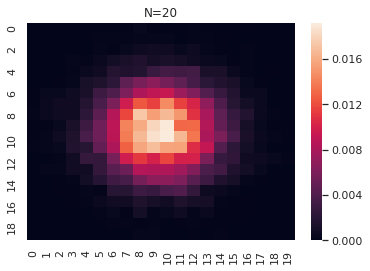

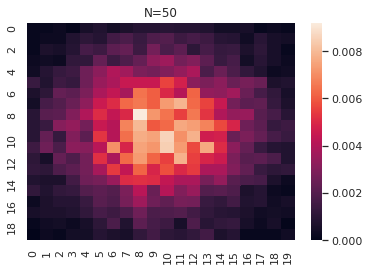

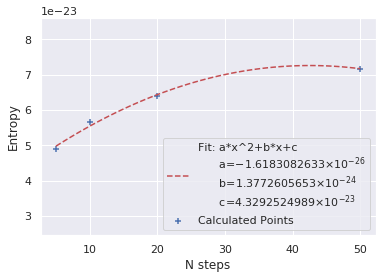

In [0]:
Ns = [5, 10, 20, 50]
average_entropies = []
for N in Ns:
    coordinates = calc_pos(N=N)
    entropy_all, Pi_all = calc_entropy(coordinates)
    Pi_all = Pi_all[:, :, np.newaxis]
    for i in range(24):
        coordinates = calc_pos(N=N)
        entropy, pi = calc_entropy(coordinates)
        Pi_all = np.dstack((Pi_all, pi))
        entropy_all = np.append(entropy_all, entropy)
    average_entropies.append(entropy_all.mean())
    pi_avgs = Pi_all.mean(axis=2)
    f, ax = plt.subplots()
    ax.set_title("N={}".format(N))
    ax = sns.heatmap(pi_avgs)



def func(x, a, b, c):
    return a*x*x + b*x + c


popt, pcov = curve_fit(func, Ns, average_entropies)

f, ax = plt.subplots()
ax.scatter(Ns, average_entropies, label='Calculated Points', marker="+")

import matplotlib.ticker as mticker
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos: "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

ax.plot(np.linspace(Ns[0], Ns[-1], 100), func(np.linspace(Ns[0], Ns[-1], 100), *popt), 'r--', color='r',
         label='Fit: a*x^2+b*x+c\n      a=%s\n      b=%s\n      c=%s' % tuple([fmt(x) for x in popt]))
ax.set_ylim(top=1.2 * max(average_entropies), bottom=0.5 * min(average_entropies))
ax.set_xlabel("N steps")
ax.set_ylabel("Entropy")
ax.legend()
plt.show()